In [1]:
import pandas as pd

In [3]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [4]:
print(customers.info())
print(products.info())
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [5]:
print(customers.describe(include="all"))
print(products.describe(include="all"))
print(transactions.describe(include="all"))

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                    NaN      NaN  397.090000
max          N

In [6]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())


0
0
0


In [10]:
merged = pd.merge(transactions, customers, on="CustomerID", how="left")
merged = pd.merge(merged, products, on="ProductID", how="left")
print(merged.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')


In [17]:
merged = pd.merge(transactions, customers, on="CustomerID", how="left")

merged = pd.merge(merged, products, on="ProductID", how="left")

if "Price_y" not in merged.columns or "Quantity" not in merged.columns:
    raise KeyError("Price_y or Quantity column is missing in the merged dataframe.")

merged["TransactionAmount"] = merged["Price_y"] * merged["Quantity"]

top_products = merged.groupby("ProductName")["TransactionAmount"].sum().sort_values(ascending=False)
print("Top products by sales:")
print(top_products.head())

revenue_per_customer = merged.groupby("CustomerName")["TransactionAmount"].sum().sort_values(ascending=False)
print("Total revenue by customer:")
print(revenue_per_customer.head())


Top products by sales:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TransactionAmount, dtype: float64
Total revenue by customer:
CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TransactionAmount, dtype: float64


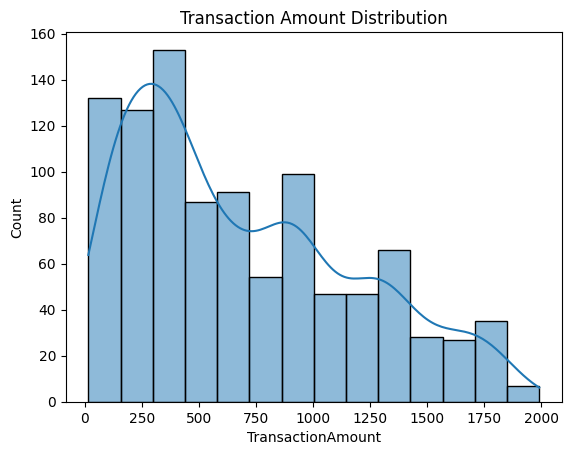

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of transaction amounts
sns.histplot(merged["TransactionAmount"], kde=True)
plt.title("Transaction Amount Distribution")
plt.show()


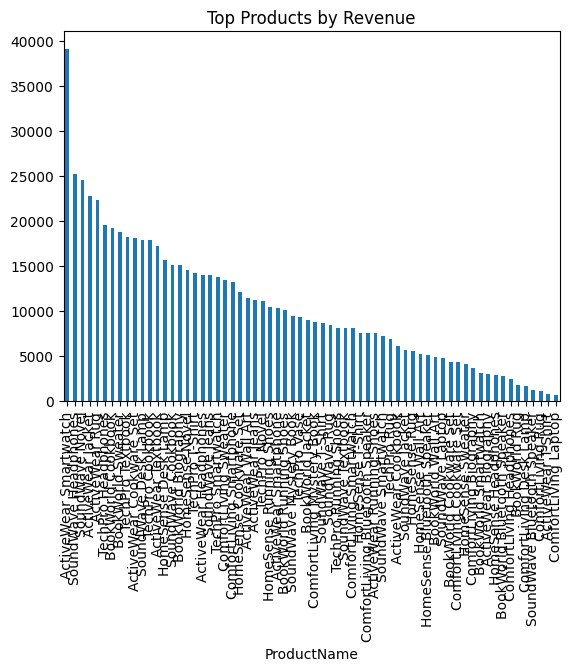

In [20]:
top_products.plot(kind="bar", title="Top Products by Revenue")
plt.show()
